Case study: TaufKirchen building model

In [33]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
import SPCE_ParallelGP as SPCE
import time

config_file_path = r"C:/Users/v196m/Desktop/master_project/Masterarbeit/TESTING_ENV/config/config_TEST2_SDOF_SBAGM_6.json"
Y_path = r"C:/Users/v196m/Desktop/master_project/Masterarbeit/TESTING_ENV/InputData/Realization/TEST3_Y_SBAGM_V6_VAL_RAND_DOE_1000_DIR_Z.mat"
save_dir = r"C:/Users/v196m/Desktop/master_project/Masterarbeit/TESTING_ENV/TrainResult/"

Model = SPCE.StochasticPCE(config_file_path, numDOE= None)
Y = sio.loadmat(Y_path)
Realization = np.array([Y["Y"]])[0]
Model.InputRealization(Realization)
#Model.BuildModel_SPCE(tol_err=1E-6, show_info_ = False, overfit_count_ = 2,  save_result_ = True, result_path_ = save_dir)


Model.Read_result(save_dir,"SPCE_Result_Y_3rd.json",show_info_= True)
#SPCE_Result_0508210520_X.json
#SPCE_Result_0509012134_Y.json
#SPCE_Result_0424013224_Z.json

#SPCE_Result_X_2nd.json


Input_sets = np.hstack((Model.X_train, Realization))
# Save the combined array to a .mat file
#sio.savemat(r"C:/Users/v196m/Desktop/master_project/Masterarbeit/TESTING_ENV/PredictionResult/Valid_sets.mat", {'Valid_sets': Input_sets})

#combined_array = np.hstack((X_pred, Y_pred))
# Save the combined array to a .mat file
#sio.savemat('combined_array.mat', {'combined_array': combined_array})

error_1_list = []
error_2_list = []
num_repeat = 30
for i in range(0,num_repeat):
    #Model.Read_result(save_dir,"SPCE_Result_DATA100_1.json",show_info_= True)
    X_pred, Y_pred = Model.Predict_SPCE(load_type = "mat_file",Predict_type = "all_X", input_X = Model.X_path)
    error_1, error_2 = Model.ComputeERROR_WD(Y_pred, np.array([Y["Y"]])[0])
    error_2_list.append(error_2)

print(np.mean(error_2_list),np.std(error_2_list))


-------------------------------------------------------------------------------
Initialized SPCE successfully
     Using Stochastic PCE solver
     Input X with shape (N,num_Vars): (500, 6)
     Input Y with shape (N,1)       : (0,)
     WARNING, No realization will be inputed when initialize the clase 
           Please use method: InputRealization() to initialize realization Y
 
     Config information: 
   {
    "X_path": "C:/Users/v196m/Desktop/master_project/Masterarbeit/TESTING_ENV/InputData/TEST2_X_SBAGM_V6_VAL_DOE_500_DIR_Z_SPLIT.mat",
    "X_type": {
        "x1": "Gaussian",
        "x2": "Uniform",
        "x3": "Uniform",
        "x4": "Gaussian",
        "x5": "Gaussian",
        "x6": "Gaussian"
    },
    "OrthPolyParams": {},
    "Z_type": [
        "Gaussian"
    ],
    "Solver": "HybridLAR",
    "max_poly_degree": 4,
    "q_norm": [
        0.5,
        0.75,
        1
    ],
    "save_result_path": "C:/Users/v196m/Desktop/master_project/Masterarbeit/StochasticPCE"
}


Validation, checking fix point: 49, 149, 249, 349, 449

-------------------------------------------------------------------------------
Start Prediction, variables X will be overwritten.
Gaussian
-------------------------------------------------------------------------------
Create Information Matrix
Create Information Matrix successfully, shape: (500, 37)
(500, 37)
Generate predicted data, X_pred: ((500, 6), Y_pred: ((500,)).
###############################################################################
-------------------------------------------------------------------------------
Start Compute Wassersein distance.
Quadratic Wasserstein distance: 0.012978521398071053
Wasserstein distance: 0.07696037381737833


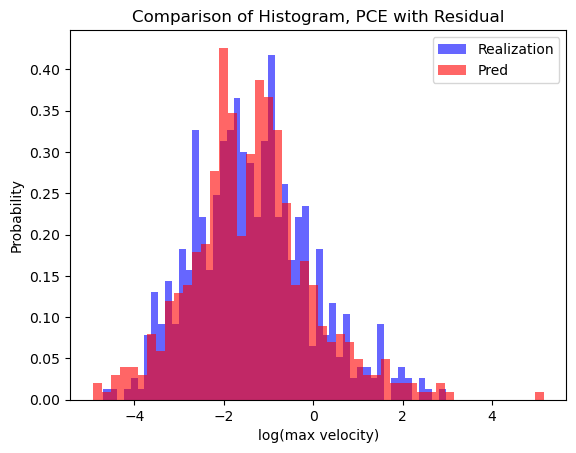

In [15]:
# Validation 
valid = Model.X_train[349,:]
a = np.zeros((500,6))
vary_params = np.zeros((500,))

a[:,0] = valid[0]
a[:,1] = valid[1]
a[:,2] = valid[2]
a[:,3] = valid[3]
a[:,4] = valid[4]
a[:,5] = valid[5]


#Generate prediction
#X_pred, Y_pred = Model.Predict_SPCE(load_type = "np_arr",Predict_type = "all_X", input_X = a)
X_pred, Y_pred = Model.Predict_SPCE(load_type = "mat_file",Predict_type = "all_X", input_X = Model.X_path)
#Compute the error
Model.ComputeERROR_WD(Y_pred, Realization)
# Combine the arrays along the second axis (columns)


Pred_sets = np.hstack((X_pred, Y_pred.reshape((500, 1))))
# Save the combined array to a .mat file
sio.savemat(r"C:/Users/v196m/Desktop/master_project/Masterarbeit/TESTING_ENV/PredictionResult/Pred_sets.mat", {'Pred_sets': Pred_sets})

#combined_array = np.hstack((X_pred, Y_pred))
# Save the combined array to a .mat file
#sio.savemat('combined_array.mat', {'combined_array': combined_array})


# Plot the histogram
plt.hist(Realization.flatten(), bins=50, density=True, alpha=0.6, color='b',label = 'Realization')
plt.hist(Y_pred.flatten(), bins=50, density=True, alpha=0.6, color='r',label = 'Pred')
plt.xlabel('log(max velocity)')
plt.ylabel('Probability')
plt.title('Comparison of Histogram, PCE with Residual')
plt.legend()
plt.show()#

Sensitivity Analysis

-------------------------------------------------------------------------------
Start Sensitivity Analysis
    Current Num of Indices used is 6, max Num is 9


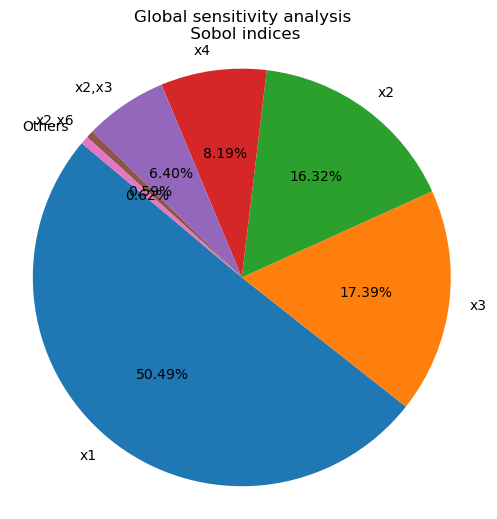

Perform Sensitivity Analysis succesfully
X1 index -> M_L
X2 index -> Rupture distance in X 
X3 index -> Rupture distance in Y 
X4 index -> Natural frequency of Ground motion
X5 index -> Natural frequency of Building
X6 index -> Damping ratio of Building


In [79]:
Model.SensitivityAnalysis(NumIndices= 6, Qol_based= True,show_info_=True)

print("X1 index -> M_L")
print("X2 index -> Rupture distance in X ")
print("X3 index -> Rupture distance in Y ")
print("X4 index -> Natural frequency of Ground motion")
print("X5 index -> Natural frequency of Building")
print("X6 index -> Damping ratio of Building")

Response Surface

-------------------------------------------------------------------------------
Start Prediction, variables X will be overwritten.
Gaussian
-------------------------------------------------------------------------------
Create Information Matrix
Create Information Matrix successfully, shape: (100, 37)
(100, 37)
Generate predicted data, X_pred: ((100, 6), Y_pred: ((100,)).
###############################################################################
-------------------------------------------------------------------------------
Start Prediction, variables X will be overwritten.
Gaussian
-------------------------------------------------------------------------------
Create Information Matrix
Create Information Matrix successfully, shape: (100, 37)
(100, 37)
Generate predicted data, X_pred: ((100, 6), Y_pred: ((100,)).
###############################################################################
-------------------------------------------------------------------------------
Start Pred

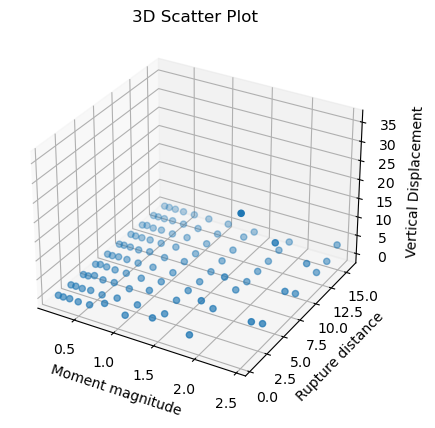

In [19]:
# Define the ranges for x and y
x_range = np.linspace(-2.4, 2.4, 10)
y_range = np.linspace(-1, 1, 10)
# Create the mesh grid
X, Y = np.meshgrid(x_range, y_range)
# Flatten the mesh grid
X_flat = np.ravel(X)
Y_flat = np.ravel(Y)

valid = Model.X_train[149,:]
a = np.zeros((100,6))


a[:,0] = X_flat
a[:,1] = 0
a[:,2] = Y_flat
a[:,3] = np.mean(Model.X_train[:,3])
a[:,4] = np.mean(Model.X_train[:,4])
a[:,5] = np.mean(Model.X_train[:,5])

num_repeat = 100
Respone_date = np.zeros((100, 7, num_repeat))

for i in range(0,num_repeat):
    X_pred, Y_pred = Model.Predict_SPCE(load_type = "np_arr",Predict_type = "all_X", input_X = a)
    Respone_date[:,:,i] = np.hstack((X_pred, Y_pred.reshape((100, 1))))
    

sio.savemat(r"C:/Users/v196m/Desktop/master_project/Masterarbeit/TESTING_ENV/PredictionResult/Response_Z.mat", {'Y': Respone_date})

# Create 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(np.exp(-0.378+ 0.53*X_pred[:,0]), 8+7.5*X_pred[:,2], np.exp(Y_pred))

# Add labels and title
ax.set_xlabel('Moment magnitude')
ax.set_ylabel('Rupture distance')
ax.set_zlabel('Vertical Displacement')
ax.set_title('3D Scatter Plot')

# Show plot
plt.show()



Fragility Analysis

-------------------------------------------------------------------------------
Start Prediction, variables X will be overwritten.
Gaussian
-------------------------------------------------------------------------------
Create Information Matrix
Create Information Matrix successfully, shape: (100, 58)
(100, 58)
Generate predicted data, X_pred: ((100, 6), Y_pred: ((100,)).
###############################################################################
-------------------------------------------------------------------------------
Start Prediction, variables X will be overwritten.
Gaussian
-------------------------------------------------------------------------------
Create Information Matrix
Create Information Matrix successfully, shape: (100, 58)
(100, 58)
Generate predicted data, X_pred: ((100, 6), Y_pred: ((100,)).
###############################################################################
-------------------------------------------------------------------------------
Start Pred

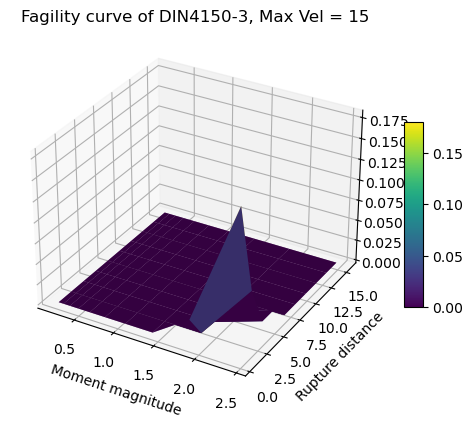

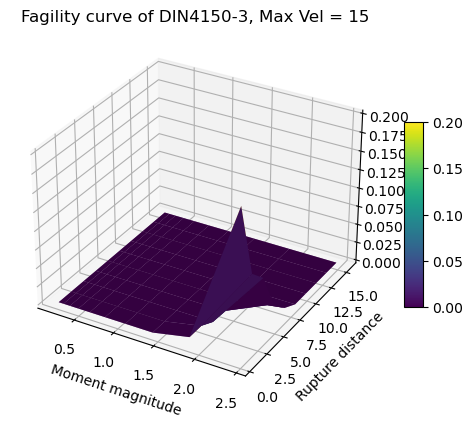

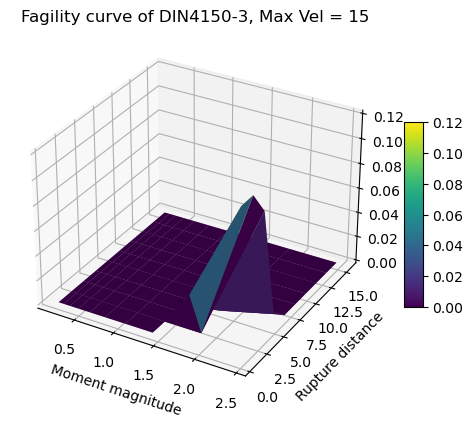

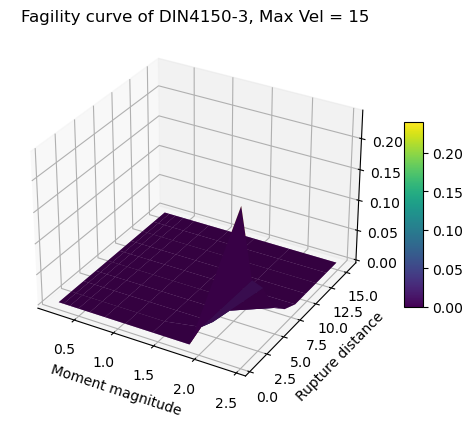

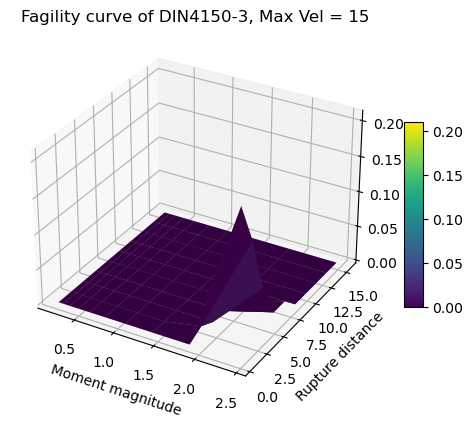

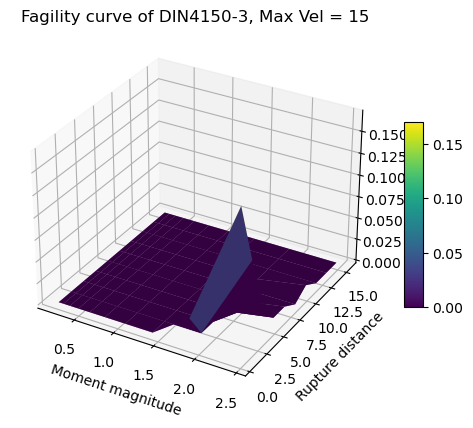

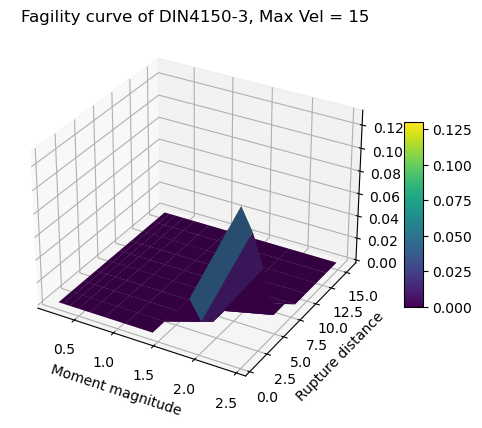

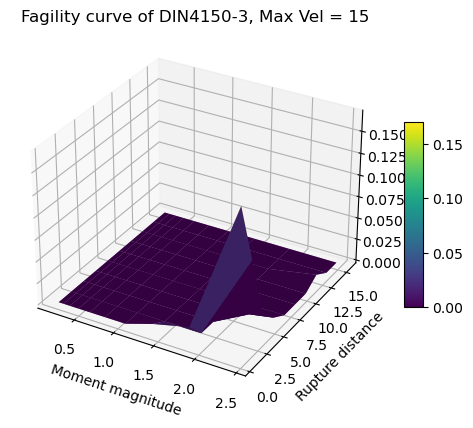

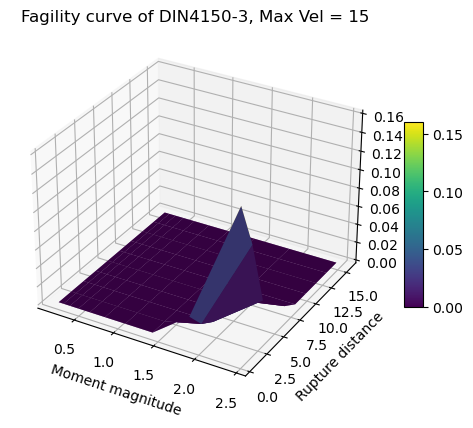

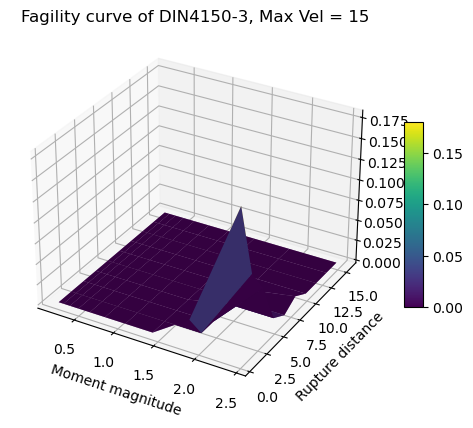

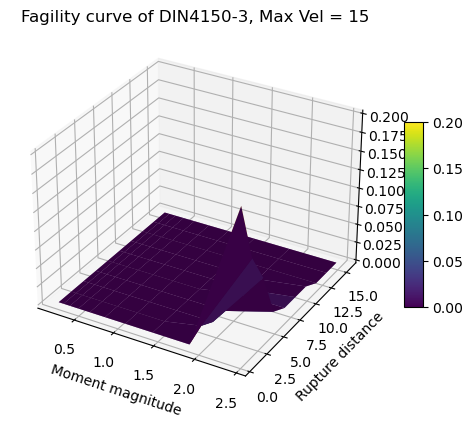

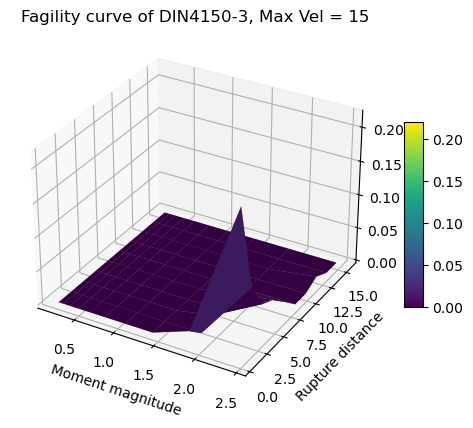

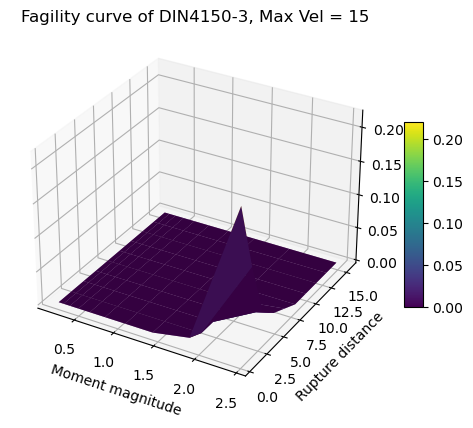

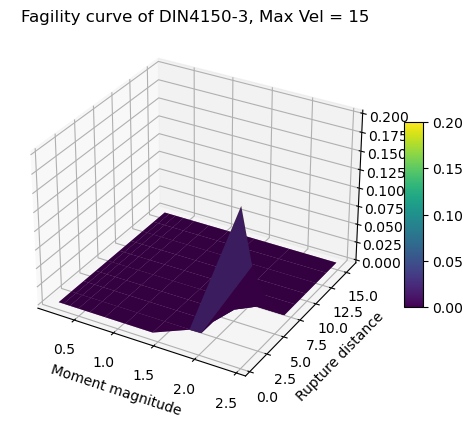

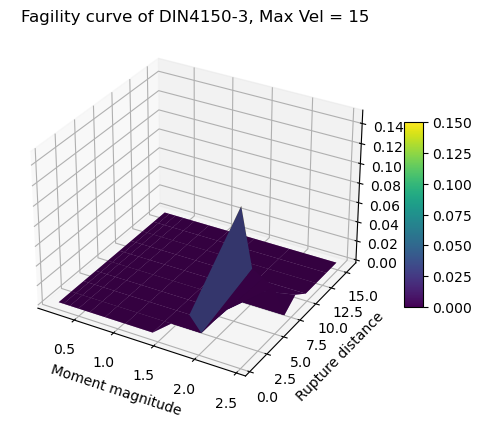

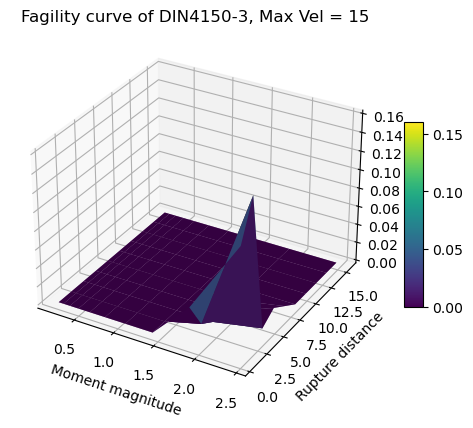

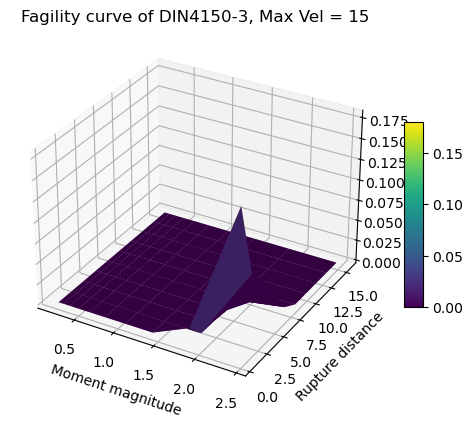

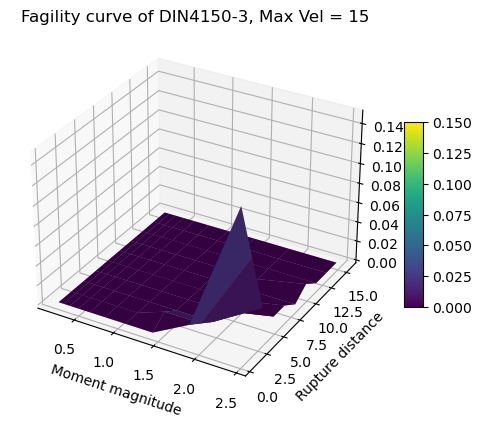

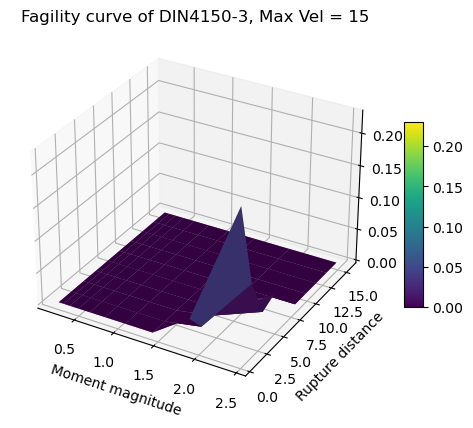

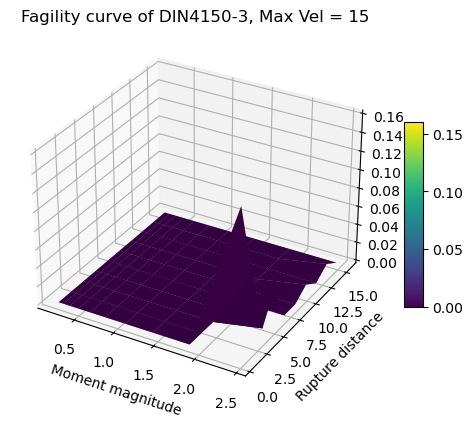

In [34]:
from mpl_toolkits.mplot3d import Axes3D


def DIN4150_2_Eval(Vmax_array):
    KB_max = (0.8/(np.sqrt(2)*np.sqrt(1 + np.power((5.6/14),2)))) * Vmax_array
    return KB_max


def FragilityCurve3D(model, Threshold, DIN_type):
    num_repeat = 100
    x_range = np.linspace(-2.4, 2.4, 10)
    y_range = np.linspace(-1, 1, 10)
    # Create the mesh grid
    X, Y = np.meshgrid(x_range, y_range)
    # Flatten the mesh grid
    X_flat = np.ravel(X)
    Y_flat = np.ravel(Y)

    valid = Model.X_train[149,:]
    a = np.zeros((num_repeat,6))
    result = None
    
    for i in range(len(X_flat)):
        a[:,0] = X_flat[i]
        a[:,1] = 0
        a[:,2] = Y_flat[i]
        a[:,3] = np.mean(Model.X_train[:,3])
        a[:,4] = np.mean(Model.X_train[:,4])
        a[:,5] = np.mean(Model.X_train[:,5])
        X_pred, Y_pred = model.Predict_SPCE(load_type = "np_arr",Predict_type = "all_X", input_X = a)

        if DIN_type == 2:
            KB_max = (0.8/(np.sqrt(2)*np.sqrt(1 + np.power((5.6/14),2)))) * np.exp(Y_pred)
            indices = np.where(KB_max >= Threshold)[0]

            title_string = f'Fagility curve of DIN4150-2, Ao = {Threshold}'
        elif DIN_type == 3:
            indices = np.where(np.exp(Y_pred) >= Threshold)[0]
            title_string = f'Fagility curve of DIN4150-3, Max Vel = {Threshold}'

        # Check if combined_array is null
        if result is None:
            # Initialize combined_array with array1 if it is null
            result = np.array([X_pred[0,0], X_pred[0,1], len(indices)/num_repeat])
        else:
            # Append array1 horizontally to combined_array
            result = np.vstack((result, np.array([X_pred[0,0], X_pred[0,2], len(indices)/num_repeat])))

    X_plot = X_flat.reshape(X.shape)
    Y_plot = Y_flat.reshape(Y.shape)
    # Reshape Z to match the shape of X and Y
    Z = result[:,2]
    Z = Z.reshape(X.shape)

    # Plot the surface
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    surf  = ax.plot_surface(np.exp(-0.378+ 0.53*X), 8+7.5*Y, Z, cmap='viridis', alpha=0.5)
    # Add color bar
    #fig.colorbar(surf, shrink=0.5, aspect=5)

    #surf = ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.7)

    # Modify colors based on Z values
    norm = plt.Normalize(Z.min(), Z.max())
    colors = plt.cm.viridis(norm(Z))

    # Modify 3D shape based on Z values
    ax.plot_surface(np.exp(-0.378+ 0.53*X), 8+7.5*Y, Z, facecolors=colors,antialiased=True, linewidth=0)

    # Add color bar
    mappable = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
    mappable.set_array(Z)
    fig.colorbar(mappable, shrink=0.5, aspect=10)

    # Add labels and title
    ax.set_xlabel('Moment magnitude')
    ax.set_ylabel('Rupture distance')
    ax.set_zlabel('Probability')
    ax.set_title(title_string)

    # Show plot
    #plt.show()

    return result

#KB_eval = DIN4150_2_Eval(np.exp(sorted_Y_pred))
#plt.scatter(sorted_X_pred[:,0],KB_eval)
#plt.show()

num_repeat = 20
Respone_date = np.zeros((100, 3, num_repeat))
for i in range(0,num_repeat):
    resp = FragilityCurve3D(Model,15,3)
    Respone_date[:,:,i] = resp
    
sio.savemat(r"C:/Users/v196m/Desktop/master_project/Masterarbeit/TESTING_ENV/PredictionResult/Response_Y_FC3_1.mat", {'Y': Respone_date})

#FragilityCurve3D(Model,3,2)
#FragilityCurve3D(Model,0.2,2)


